<a href="https://colab.research.google.com/github/Shrustimoolimath/Image-Recognition-with-Machine-Learning-using-PyTorch/blob/main/Image_Recognition_with_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from torchvision import models
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

In [2]:
alexnet = models.AlexNet()

In [3]:
resnet = models.resnet101(pretrained=True)
resnet

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth
100%|██████████| 171M/171M [00:01<00:00, 144MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [4]:
from torchvision import transforms
preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )])

Saving Screenshot (21).png to Screenshot (21) (1).png


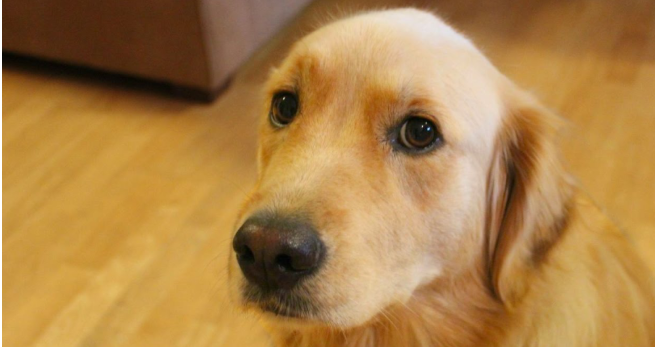

In [5]:
from google.colab import files
uploaded = files.upload()
from PIL import Image
img = Image.open("/content/Screenshot (21).png")
img

In [7]:
from torchvision import transforms
from PIL import Image
import torch # Import torch to use torch.uint8

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    # Convert the tensor to RGB format (discard the alpha channel if it exists)
    transforms.Lambda(lambda x: x[:3, :, :]),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

from google.colab import files
uploaded = files.upload()
img = Image.open("/content/Screenshot (21).png")

img_t = preprocess(img)

Saving Screenshot (21).png to Screenshot (21) (2).png


In [8]:
import torch
batch_t = torch.unsqueeze(img_t, 0)
resnet.eval()
out = resnet(batch_t)
out

tensor([[-3.2013e+00, -1.2833e+00, -2.5727e+00, -3.1779e+00, -3.0490e+00,
         -1.1363e+00, -2.2732e+00, -1.9544e+00, -3.6801e-01, -2.2722e+00,
         -1.5439e+00, -1.3164e+00, -2.8860e+00, -2.8772e+00, -3.0694e+00,
         -2.5721e+00, -2.9506e+00, -8.2602e-01, -6.2959e-01, -9.8336e-01,
         -2.6743e+00, -3.9347e+00, -2.8669e+00, -1.8345e+00, -1.6016e+00,
         -7.6819e-01, -3.0765e+00, -2.3919e+00, -2.3430e+00, -2.6041e+00,
         -3.1755e+00, -1.8553e+00, -1.3673e+00, -1.4234e+00, -1.9653e+00,
         -2.7569e+00, -8.0944e-01, -5.5247e-01, -2.0060e+00, -2.2590e+00,
         -1.7691e+00, -2.7541e+00,  5.5006e-01, -4.0339e-01, -2.4966e+00,
         -1.3725e+00, -7.7661e-01, -1.7333e+00, -3.0907e+00, -2.9999e+00,
         -2.2643e+00, -1.2913e+00, -1.6718e+00, -1.7269e+00, -1.0485e+00,
         -1.6556e+00, -7.2853e-01, -2.0900e+00, -2.9547e+00, -9.4814e-01,
         -7.0857e-01, -1.0873e+00, -8.1847e-01, -1.0490e+00, -2.0027e+00,
         -2.1191e+00, -1.6462e+00, -5.

In [10]:

!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

with open('imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]
_, index = torch.max(out, 1)

percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

--2025-05-17 21:08:04--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘imagenet_classes.txt’

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0.001s  

2025-05-17 21:08:04 (17.3 MB/s) - ‘imagenet_classes.txt’ saved [10472/10472]



('golden retriever', 87.78148651123047)